## Project 4: Epidemic Simulation

#### Archana Mohan

**Introduction:**

The `Epidemic Simulation` project aims to document the spread of a contagious disease in a fictitious region of 40,000 'people'. We also assume that parts of the population are already being subject to vaccination since early days of the epidemic.  We make use of basic probabilities to determine the state of the simulated epidemic. To determine the evolution of the disease, we need access to three probability variables: the infection rate, $P_i$: risk of an infection, the recovery rate, $P_r$:  rate at which an individual recovers from the disease, the vaccination rate, $P_v$:  proportion of a population that is vaccinated on a given day. The state of an individual is represented in integers in the range -1 to 2. `-1` indicates vaccinated, `0` is healthy, `1` is an infected person, and `2` is a recovered individual. 

The probability of a healthy individual getting infected is dependant on $P_i$ and the number of infected people in their immediate neighborhood, $k$. It is given by the formula:
$$\textit{P(sickness)} = 1 - (1 - P_i)^k$$

*Assumptions made in the epidemic simulation:*
1. Infection is determined only by the number of infected people in the immediate neighborhood.
2. Neither mortality from the disease nor reinfection is possible.
3. Vaccination guarantees complete immunity from the disease. Hence, infection after vaccination is impossible.

Subject to the above constraints and utilizing basic probability theory, we visualize the spread of the simulated epidemic in this work. Our *goal* would be to determine how the rate and extent of spread varies with the variables $P_i, P_r, P_v$, and obtain plots of the relationship between these variables. 




**The Project:**
<br/>The project is made up of three parts. 
<br/>*Part 1* comprises the `neighbors()` and `epidemics()` functions essential for simulating the required epidemic. The `neighbors()` function helps extract the immediate neighbors of an individual in the region. The `epidemics()` function returns the state of the epidemic spread in the region for tomorrow given the state of the spread today.
<br/>*Part 2* includes plots generated for the `epidemics()` function, given certain conditions. It includes quantitative inferences of the relationship among the probability variables,$P_i, P_r, P_v$. 
<br/>*Part 3* consists of animated plot generated to have a qualitative look at the spread of the epidemic.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.animation import FuncAnimation

**PART 1**

*Defining the population:*
<br/>Before we delve into the functions themselves, we need to define the intial state of our population of 40,000 'people'. For this project's purposes, the initial state of the population is defined as largely free of infection except for 16 individuals located in the center of the region. To achieve this state, we make use of a $200 \times 200$ matrix where all positions except for a $4 \times 4$ subsection at the very center is set to 0, indicating healthy individuals. The cells in central $4 \times 4$ matrix is all set to 1, indicating infection. 
<br/>
<br/>However in such a setup, we run into an obstacle at the borders. Since the `neighbors()` function is designed to extract all the cells surrounding the matrix, it becomes inefficient at the cells in the border. To rectify that, we add a pseudo-layer of ghost cells around the matrix that are all set to 0. They will remain unchanged throughout the analysis. So , our initial region then end up being a $202 \times 202$ matrix `mtr`.


In [2]:
mtr = np.zeros((202,202)) #generating a 202 x 202 zero matrix
infect = np.ones((4,4)) # defining a 4 x 4 matrix of all ones
#slicing a 4x4 part at the center of mtr and replacing it with the all-ones matrix
mtr[98:102,98:102] = infect 

The `mtr` defined above will be the state of the population on day 0 of the epidemic analysis.

**neighbors( ) function:**
<br/> This function returns a $3 \times 3$ matrix that includes the desired cell (in the exact center) and it's immediate neighbors. It utilizes the row and column indices in a matrix to produce the neighbors. Since we only need the immediate neighbors, for a cell in a matrix with position `(row, col)`, it'll return the neighbors from the positions `row + x` and `row + y` where `x`, `y` are the row column amends needed from the list [-1,0,1]. 

In [3]:
#defining the function
def neighbors(mat, row, col): #takes in a matrix, specific row and column number of a cell
    
    pvar = [0,-1,1] #the list to determine amends made to position

    m = np.array([mat[row + x, col + y] 
                  for x in pvar for y in pvar]).reshape(3,3) # extracting the 3x3 matrix of neighbors of a cell
          
    return m

Given below is a demonstration of `neighbors()`.

In [4]:
print(neighbors(mtr,97,100)) #neighbor matrix for cell at 98th row, 101th column in mtr

[[0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]]


**epidemics( ) function:**
<br/>The `epidemics()` function is the building block of the epidemic simulator. It takes in the population matrix and the probability variables $P_i, P_r, P_v$ and returns the matrix depicting the epidemic state of the region for the next day. We use a `nested for loop` to look through each cell in the region, excluding the ghost cells. And, within this nested loop, we use a series of conditional statement to determine the state of a cell on the next day. If a cell is healthy today (`0`) and the probability of it getting sick (evaluated using the equation $\textit{P(sickness)} = 1 - (1 - P_i)^k$) is greater than a certain criterion, we deem it infected (`1`). If not, based on the $P_v$ value, the cell will have a chance at getting vaccinated (`-1`). If the cell is infected, then based on the $P_r$ value, it'll have a chance at recovery(`2`). The number of infected neighboring cells $k$ is determined using `boolean indices` on the $3 \times 3$ neighbors matrix.
<br/>The critierion itself is based off of a randomly generated $202 \times 202 $ matrix `rd` where all the elements are in the range [0,1]. The probability values of a cell in the population matrix are compared to the corresponding cells in the random matrix to determine their condition next day.

In [5]:
def epidemics(m,pi,pr,pv): #defining the function along with the variables it takes in 
    
    '''This function returns the epidemics 
    spread of a population for the following day''' #docstring
    
    mat = m.copy() #producing a copy of entered matrix
    rd = np.random.rand(202,202) #generating a random 202x202 matrix 
    
    #defining the nested for loop to extract each cell 
    for r in range(1,201): #extracting row index
        for c in range(1,201):  #extracting column index
            
            cell = mat[r][c] # assigning variable to each element in matrix
            get_n = neighbors(m,r,c) #extracting the neighbor cells using the previous function
            bn = (get_n == 1) #boolean matrix where all infected cells return True
            nsick = bn.sum() #producing the sum to give the number of infected neighboring cells
            
            if cell == 0: # a healthy cell
                psick = 1-(1-pi)**nsick # finding the probability of getting sick
                if psick > rd[r][c]: # if prob(sick) is > than the corresponding number in rd
                     mat[r][c] = 1   #the cell is deemed infected
                elif pv > rd[r][c]:  # if not, if the Pv > corresponding cell in rd
                    mat[r][c] = -1   # the cell deemed vaccinated
                    
            elif cell == 1:      # an infected cell
                if pr > rd[r][c]: # if the Pr > corresponding rd cell
                     mat[r][c] = 2  #the cell deemed recovered
                     
            
    return mat #matrix for the following day

**PART 2**

Provided below is a demonstration of the `epidemics()` function for the population matrix `mtr` with $P_i = 30\%$, $P_r = 20\%$, and $P_v = 1\%$. We plot the initial state and the epidemic state of the region in the following day. Henceforth, the plots will have designated colors to indicate the state of a cell. It's given by: `-1` -pale green, `0` - green, `1` - black, `2` - orange.

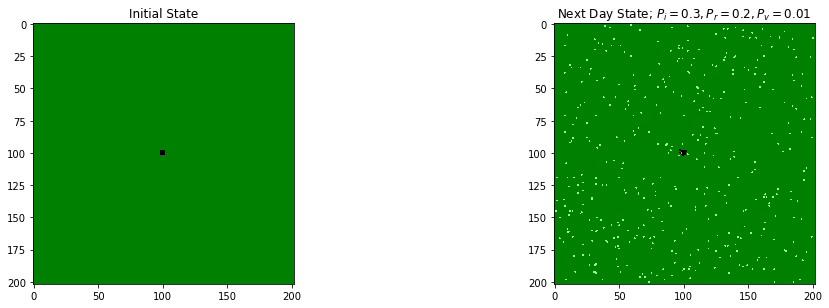

In [6]:
%matplotlib inline
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange']) #the colors to indicate state of a cell

plt.figure(figsize=(14,14))
plt.subplots_adjust(wspace=1,hspace=2)

plt.subplot(1,2,1) #first subplot for the initial state of the population
plt.title('Initial State')
plt.imshow(mtr,cmap = cmap, vmin = -1, vmax = 2);


plt.subplot(1,2,2) #second plot for the state during the next day
plt.title(r'Next Day State; $P_i = 0.3, P_r = 0.2, P_v = 0.01$')
plt.imshow(epidemics(mtr, 0.3, 0.2, 0.01),cmap = cmap, vmin = -1, vmax = 2);


In the next section, we'll work on analyzing how the probability variables ($P_i, P_r, P_v$) affect the spread of the disease. For this, we define a function `effect()` that takes in the variables `m` - the population matrix, the probabilities needed, and `d`, the number of days for which we need the results. It'll then return the list containing the numbers of infected individuals and numbers of recovered individuals for each day.

In [7]:
def effect(m,pi,pr,pv,d):
    
    d0 = m.copy() # creating a copy of the population matrix to work on
    init = (m==1).sum() # storing the initial number of all infected individuals
    inf = [init] #the list containing all numbers of infected individuals
    inr = [0] #the list containing all numbers of recovered individuals
    
    for dy in range(1,d + 1): # loop in a certain number of days 'd'

        dx = epidemics(d0, pi, pr, pv) #finding the epidemic state of the population 
        b1 = (dx == 1) #boolean matrix to determine the infected individuals 
        inum = b1.sum() #finding the number of infected cells
        inf.append(inum) #adding it to the `inf` list

        b2 = (dx == 2) 
        rnum = b2.sum() #boolean sum to find the number of recovered cells
        inr.append(rnum) #adding it to the `inr` list
        d0 = dx  #update line
        
    return inf, inr #returing the desired lists 

We'll use the `effect()` function to plot the infection and recovery rates over a 30-day period, subject to the condition that if the population is vaccinated or not. The first two plots will be for the infection and recoveries of the population with an infection rate of $P_i = 30\%$ and a recovery rate of $P_r = 20\%$. The next two will be for a higher $P_i = 50\%$ and a lower $P_r = 10\%$. Black plots indicate the infection rate while the magenta indicates recovery.

In [ ]:
%matplotlib inline
#adjusting the plot size, interplot space, and defining the title 
plt.figure(figsize = (14,8))
plt.subplots_adjust(hspace=1,wspace=0.5) 
plt.suptitle("The Thirty Day Spread")

#plotting the no vaccine case for Pi=0.3,Pr=0.2
plt.subplot(2,2,1)
plt.grid(color='k', ls='-', lw=0.1)
plt.plot(effect(mtr, 0.3, 0.2, 0, 30)[0],'k-') #plot the raw infection numbers for 30 days
plt.plot(effect(mtr, 0.3, 0.2, 0, 30)[1],'m-') #plot the raw recovery numbers for 30 days
plt.title(r'Spread with No Vaccine; $P_i = 0.3, P_r = 0.2$')

#Plotting the infection and recovery with vaccination(Pv=1%) for case above
plt.subplot(2,2,2)
plt.grid(color='k', ls='-', lw=0.1)
plt.plot(effect(mtr, 0.3, 0.2, 0.01, 30)[0],'k-')
plt.plot(effect(mtr, 0.3, 0.2, 0.01, 30)[1],'m-')
plt.title(r'Spread with Vaccine; $P_i = 0.3, P_r = 0.2$')

#Plotting the no vaccine case for Pi=0.5,Pr=0.1
plt.subplot(2,2,3)
plt.grid(color='k', ls='-', lw=0.1)
plt.plot(effect(mtr, 0.5, 0.1, 0, 30)[0],'k-')
plt.plot(effect(mtr, 0.5, 0.1, 0, 30)[1],'m-')
plt.title(r'Spread with No Vaccine; $P_i = 0.5, P_r = 0.1$')

#Plotting the infection and recovery with vaccination(Pv=1%) for case above
plt.subplot(2,2,4)
plt.grid(color='k', ls='-', lw=0.1)
plt.plot(effect(mtr, 0.5, 0.1, 0.01, 30)[0],'k-')
plt.plot(effect(mtr, 0.5, 0.1, 0.01, 30)[1],'m-')
plt.title(r'Spread with Vaccine; $P_i = 0.5, P_r = 0.1$')


plt.show()

*Inference:*
<br/>In the case of $P_i = 30\%$ and $P_r = 20\%$ with no vaccination, we see that the thirty day maximum number of infections is close to 600 whereas in the vaccinated case it is lower and closer to 400. The infection curve also begins to flatten out faster in the vaccination case than when there's no vaccine. This indicates that effective vaccines has a strong impact on infections. This result in turn is also reflected in recovery rates. Since fewer people are infected in the vaccinated case, the maximum recoveries are only ~1200 while it is over 1700 in the no vaccine case. 
<br/>This can also be demonstrated in the next case where the $P_i = 50\%$ and $P_r = 10\%$. When the population is vaccinated at a rate of $1\%$ per day, the thirty-day maximum infections is around 1100 whereas in the non-vaccinated case, it is close to 1700. Similarly, the 30-day maximum recoveries is 1500 when vaccinated and 2000 when not. The vaccinated case in here too is much faster to reach a flatter pace than the non-vaccination scenario. 
<br/>
<br/>An epidemic is said to be `contained` when the rate of recovery surpasses the rate of infection. In the first case of $P_i = 30\%$ and $P_r = 20\%$ with no vaccine, it takes ~ 12 days since the initial condition for the number of recoveries to surpass the infections. In the same disease condition but with vaccination, the containment of the epidemic also takes ~12 days. 
<br/>When the infection rate is much higher($P_i = 50\%$) and the recovery rate is much lower ($P_r = 10\%$), it takes longer for the epidemic to be contained. In both the vaccinated and non-vaccinated scenarios, the containment happens on the $24^{th}$ day. We can infer that a higher infection rate prolongs the days it'll take to contain an epidemic and a higher recovery rate would decrease it. Vaccination has possibly negligible impact on when it'll reach containment. However, vaccination can still reduce the impact of the epidemic itself.

**PART 3**

In this section, we produce an animation highlighting the spread of the epidemic. We plot for our population with $P_i = 30\%, P_r = 20\%, P_v = 1\%$. We rely on the same color scheme as we 've used prior.

In [ ]:
%matplotlib notebook

x = mtr #assigning the initial state of the population


fig = plt.figure(figsize = (6,6)) #adjusting the size 
ax = plt.subplot(111)
plt.title("Epidemic Spread")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange']) #defining the color scheme
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2) #plotting the population matrix

#defining the function to animate within a loop
def animate(i):
    global x #access the variable `x` outside of the function

    x = epidemics(x,0.3,0.2,0.01) #finding the epidemic spread for the following day
    im.set_data(x) #update line
    return im

#producing the animation
anim = FuncAnimation(fig=fig, func=animate,  interval=1000, blit=True, repeat=False) 
plt.show()

In this animated visualization of the epidemic spread, we see that the infection continues to spread from the center region, the area containing the 16 infected people on day 0. The infection itself spreads outwards from the center, and tailing right behind it are also the recoveries. That we must notice however is how the spread outwards seems to grow slower as more and more people get vaccinated (pale green dots appear). At some point, when substantial amount of the population are vaccinated (an abundance of pale green dots), the spread seems to be almost unnoticeble with negligible infections (black dots) in view. This is when we deem that the population has reached `herd immunity`.  

**Conclusion:**

With this epidemic simulation project, we have three major conclusions. Firstly, that a higher infection rate and/or a lower recovery rate will lead the population to take a longer time to contain the epidemic. Secondly, effective vaccine helps in curbing the infection levels. Although vaccines reduce the impact of the epidemic significantly, they seemingly have negligible effect on containment. Finally, as more of the population gets vaccinated, the intensity of the epidemic spread decreases and when a substantial part of the region is vaccinated, the population reaches herd immunity.

****